<a href="https://colab.research.google.com/github/shankartmv/Deep-Learning-Work/blob/main/Porter_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Data

https://colab.research.google.com/drive/1mKHuu8USIKWoN91SdN3Vj4Ysro0bH1Dq

# Download the data using wget

In [ ]:
!wget -O /content/dataset.csv.zip https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760

--2023-07-30 14:11:17--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5174841 (4.9M) [application/zip]
Saving to: ‘/content/dataset.csv.zip’

/content/dataset.cs 100%[===================>]   4.93M  32.9MB/s    in 0.2s    

2023-07-30 14:11:17 (32.9 MB/s) - ‘/content/dataset.csv.zip’ saved [5174841/5174841]



In [ ]:
#!unzip dataset.csv.zip

# Install necessary libraries

In [ ]:
# !pip install category_encoders
# !pip install keras
# !pip install tensorflow

# Imports section

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, BatchNormalization
import scipy.stats as stats
from keras import layers

In [ ]:
initial_df=pd.read_csv('/content/dataset.csv')
initial_df.sample(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
48630,1.0,2015-02-09 02:35:08,2015-02-09 03:37:52,35d58f24d7a7701719c983a1ef1979b1,tapas,2.0,5,5059,5,489,1493,8.0,12.0,16.0
23086,1.0,2015-02-15 15:04:31,2015-02-15 15:44:37,351b33587c5fdd93bd42ef7ac9995a28,american,1.0,3,1350,3,200,925,0.0,0.0,1.0
8070,4.0,2015-01-26 21:37:35,2015-01-26 22:10:24,d0cbf1a1aa1726784df15a81ead214f7,greek,5.0,1,1099,1,1099,1099,34.0,71.0,42.0
68905,2.0,2015-02-09 19:38:25,2015-02-09 20:04:31,2a79ea27c279e471f4d180b08d62b00a,persian,2.0,2,1898,2,699,1199,46.0,42.0,61.0
125962,4.0,2015-02-04 23:23:25,2015-02-04 23:58:39,fbd7939d674997cdb4692d34de8633c4,chinese,3.0,2,2455,2,960,1495,12.0,11.0,11.0
164380,2.0,2015-01-24 20:05:40,2015-01-24 20:55:53,18b56cded3b3905ae2b151d1c7fe54ce,pizza,2.0,2,4384,2,899,899,53.0,61.0,81.0
76151,2.0,2015-02-13 02:55:16,2015-02-13 03:37:30,7d12b66d3df6af8d429c1a357d8b9e1a,mexican,5.0,2,1698,1,799,799,75.0,67.0,98.0
71189,3.0,2015-02-17 19:46:01,2015-02-17 20:24:39,32f791428812696ee7ce8f161ecd490c,american,1.0,3,3935,3,1145,1445,5.0,2.0,2.0
187916,2.0,2015-01-25 22:02:18,2015-01-25 22:56:26,d947bf06a885db0d477d707121934ff8,sushi,5.0,1,1300,1,1300,1300,39.0,60.0,45.0
113025,4.0,2015-02-04 19:37:54,2015-02-04 20:19:54,1534b76d325a8f591b52d302e7181331,mexican,3.0,3,2457,2,819,819,56.0,51.0,78.0


# Problem Statement : Provide an estimate of the time taken to deliver order based on the data available

# Statistical Summary

In [ ]:
initial_df.describe(percentiles=[0.02,0.05,0.1,0.2,0.25,0.5,0.75,0.80,0.9,0.95,0.98])

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
2%,1.000000,1.000000,1.000000,649.000000,1.000000,69.000000,311.080000,0.000000,0.000000,0.000000
5%,1.000000,1.000000,1.000000,805.000000,1.000000,125.000000,439.000000,4.000000,3.000000,3.000000
10%,1.000000,1.000000,1.000000,995.000000,1.000000,175.000000,599.000000,7.000000,6.000000,7.000000
20%,2.000000,1.000000,1.000000,1275.000000,1.000000,250.000000,759.000000,14.000000,12.000000,13.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000


In [ ]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

# Data Cleaning

# Conversion of column data types

In [ ]:
cat_columns=['market_id','order_protocol']
int_columns=['total_onshift_partners','total_busy_partners','total_outstanding_orders']
for col in cat_columns:
  initial_df[col]=initial_df[col].astype('category')
date_columns=['created_at','actual_delivery_time']
for col in date_columns:
  initial_df[col]=pd.to_datetime(initial_df[col])

In [ ]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  category      
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  category      
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

# Feature Engineering

In [ ]:
initial_df['time_to_deliver']=(initial_df['actual_delivery_time']-initial_df['created_at']).dt.total_seconds()/60
initial_df['day']=initial_df['created_at'].dt.weekday
initial_df['hour']=initial_df['created_at'].dt.hour

# Missing Value detection

In [ ]:
# Percentage of missing values
initial_df.isnull().sum(axis=0)/len(initial_df)*100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
time_to_deliver             0.003546
day                         0.000000
hour                        0.000000
dtype: float64

In [ ]:
print(initial_df['market_id'].value_counts())
print(initial_df[initial_df['total_onshift_partners'].isnull()]['market_id'].value_counts())

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64
6.0    13795
3.0     1620
2.0      270
4.0      215
1.0      202
5.0       92
Name: market_id, dtype: int64


<div style="background-color: #FFEBCC; display: flex;  height: 90px; text-align: center; padding: 40px">
    <font color="#FF7700" size="6">
    <b>
    Missing Values is <br>
    1. Negligent for market_id & Store_primary_category<br>
    2. Needs imputation for total_onshift_partners , total_busy_partners and total_outstanding_orders <br>
    3. For market id other than 6.0 , the values can be imputed using ffill for total_* columns <br>
    </b>
    </font>
</div>

# Impute total_* columns for market_id != 6.0

In [ ]:
temp=initial_df[initial_df['market_id']!=6.0].sort_values(['market_id','created_at'])[['total_onshift_partners','total_busy_partners','total_outstanding_orders']].bfill()
initial_df.loc[initial_df['market_id']!=6.0,['total_onshift_partners','total_busy_partners','total_outstanding_orders']]=temp

In [ ]:
initial_df[initial_df['market_id']!=6.0][['total_onshift_partners','total_busy_partners','total_outstanding_orders']].isna().sum()

total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [ ]:
print(initial_df[initial_df['total_onshift_partners'].isnull()]['market_id'].value_counts())
print(initial_df[initial_df['total_busy_partners'].isnull()]['market_id'].value_counts())
print(initial_df[initial_df['total_outstanding_orders'].isnull()]['market_id'].value_counts())

6.0    13795
1.0        0
2.0        0
3.0        0
4.0        0
5.0        0
Name: market_id, dtype: int64
6.0    13795
1.0        0
2.0        0
3.0        0
4.0        0
5.0        0
Name: market_id, dtype: int64
6.0    13795
1.0        0
2.0        0
3.0        0
4.0        0
5.0        0
Name: market_id, dtype: int64


In [ ]:
initial_df.sort_values(['market_id','created_at'])

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,day,hour
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,1595,2.0,1.0,1.0,141947.650000,6,5
43519,1.0,2015-01-21 15:22:03,2015-01-21 16:17:43,6a639c52538fd7bb3e1186724afbe9b2,dessert,4.0,2,1058,2,219,799,2.0,1.0,1.0,55.666667,2,15
187014,1.0,2015-01-21 15:39:16,2015-01-21 15:58:11,f7cfdde9db36af8e0d9a6d123d5c385e,NaN,4.0,3,1867,3,449,529,4.0,1.0,1.0,18.916667,2,15
10265,1.0,2015-01-21 15:40:42,2015-01-21 16:22:37,83f97f4825290be4cb794ec6a234595f,cafe,4.0,3,955,3,245,345,3.0,2.0,2.0,41.916667,2,15
188797,1.0,2015-01-21 15:41:33,2015-01-21 16:35:14,4195cac6ce8d484d041594a3faa2e13d,chinese,3.0,3,825,1,125,125,0.0,0.0,0.0,53.683333,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,NaN,2015-02-18 04:18:08,2015-02-18 05:36:54,8d6dc35e506fc23349dd10ee68dabb64,NaN,NaN,3,3127,3,949,1099,63.0,60.0,83.0,78.766667,2,4
101590,NaN,2015-02-18 05:00:36,2015-02-18 05:44:46,a591024321c5e2bdbd23ed35f0574dde,NaN,NaN,1,1350,1,1350,1350,0.0,0.0,0.0,44.166667,2,5
29590,NaN,2015-02-18 05:08:01,2015-02-18 05:42:02,ca75910166da03ff9d4655a0338e6b09,NaN,3.0,2,1750,2,250,1350,10.0,8.0,9.0,34.016667,2,5
72959,NaN,2015-02-18 05:19:12,2015-02-18 05:49:44,33e75ff09dd601bbe69f351039152189,NaN,3.0,2,1698,2,699,899,27.0,24.0,23.0,30.533333,2,5


# let's first sort the data by created_at time and then impute the data for market_id = 6.0 by moving average of respective total_* column which would be a good approximation assuming that the data is for a given city and irrespective of the market, the demand should be approximately similar.

In [ ]:
initial_df=initial_df.sort_values('created_at')

In [ ]:
initial_df['moving_avg_onshift']=initial_df['total_onshift_partners'].rolling(window=3,min_periods=0,center=True).mean().apply(np.ceil)
initial_df['moving_avg_busy']=initial_df['total_busy_partners'].rolling(window=3,min_periods=0,center=True).mean().apply(np.ceil)
initial_df['moving_avg_outstanding']=initial_df['total_outstanding_orders'].rolling(window=3,min_periods=0,center=True).mean().apply(np.ceil)

## for market_id=6.0 , impute the values of total_* columns by computing the mean for previous and next value. this would be a better approximation

In [ ]:
initial_df['total_onshift_partners'].fillna(initial_df['moving_avg_onshift'],inplace=True)
initial_df['total_busy_partners'].fillna(initial_df['moving_avg_busy'],inplace=True)
initial_df['total_outstanding_orders'].fillna(initial_df['moving_avg_outstanding'],inplace=True)

## Print the NA values for total_* again

In [ ]:
print(initial_df[initial_df['total_onshift_partners'].isnull()]['market_id'].value_counts())
print(initial_df[initial_df['total_busy_partners'].isnull()]['market_id'].value_counts())
print(initial_df[initial_df['total_outstanding_orders'].isnull()]['market_id'].value_counts())

6.0    103
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
Name: market_id, dtype: int64
6.0    103
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
Name: market_id, dtype: int64
6.0    103
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
Name: market_id, dtype: int64


In [ ]:
print(initial_df.isnull().sum(axis=0)/len(initial_df)*100)
print(len(initial_df))

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      0.052171
total_busy_partners         0.052171
total_outstanding_orders    0.052171
time_to_deliver             0.003546
day                         0.000000
hour                        0.000000
moving_avg_onshift          0.052171
moving_avg_busy             0.052171
moving_avg_outstanding      0.052171
dtype: float64
197428


## Drop the rows with null values in any of these columns - ['market_id','actual_delivery_time','store_primary_category','order_protocol','total_onshift_partners']

In [ ]:
df_1=initial_df.dropna(axis=0,subset=['market_id','actual_delivery_time','store_primary_category','order_protocol','total_onshift_partners'])
df_1=df_1.drop(columns=['moving_avg_onshift','moving_avg_busy','moving_avg_outstanding'])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191822 entries, 2690 to 61787
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 191822 non-null  category      
 1   created_at                191822 non-null  datetime64[ns]
 2   actual_delivery_time      191822 non-null  datetime64[ns]
 3   store_id                  191822 non-null  object        
 4   store_primary_category    191822 non-null  object        
 5   order_protocol            191822 non-null  category      
 6   total_items               191822 non-null  int64         
 7   subtotal                  191822 non-null  int64         
 8   num_distinct_items        191822 non-null  int64         
 9   min_item_price            191822 non-null  int64         
 10  max_item_price            191822 non-null  int64         
 11  total_onshift_partners    191822 non-null  float64       
 12  

In [ ]:
df_1.sample(20)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,day,hour
113684,4.0,2015-02-03 21:20:36,2015-02-03 22:00:13,a3f390d88e4c41f2747bfa2f1b5f87db,other,3.0,2,1200,1,600,600,42.0,37.0,43.0,39.616667,1,21
77944,1.0,2015-02-17 03:04:17,2015-02-17 03:39:07,1368ba1ab6ed38bb1f26f36673739d54,seafood,1.0,4,5300,4,1000,1600,54.0,41.0,51.0,34.833333,1,3
112357,2.0,2015-01-22 02:12:55,2015-01-22 02:33:37,839ab46820b524afda05122893c2fe8e,chinese,3.0,5,4775,5,595,1295,76.0,95.0,115.0,20.700000,3,2
20141,3.0,2015-02-09 02:11:07,2015-02-09 02:50:58,63c6598e9ddd2961e7dfa4d4eb8144a1,pizza,1.0,1,2322,1,1646,1646,16.0,15.0,15.0,39.850000,0,2
182481,3.0,2015-01-24 21:07:35,2015-01-24 21:40:19,7a430339c10c642c4b2251756fd1b484,fast,4.0,6,3036,5,300,639,18.0,18.0,16.0,32.733333,5,21
174031,4.0,2015-02-12 22:57:00,2015-02-12 23:26:53,ca0daec69b5adc880fb464895726dbdf,burmese,1.0,3,1485,2,195,1095,16.0,9.0,9.0,29.883333,3,22
192878,6.0,2015-01-25 20:46:40,2015-01-25 21:25:57,7259202cea475e0e98aa076037cc3f15,american,3.0,3,2115,3,225,1095,12.0,16.0,10.0,39.283333,6,20
26424,4.0,2015-01-26 01:17:43,2015-01-26 01:45:00,642e92efb79421734881b53e1e1b18b6,chinese,5.0,6,4170,2,695,695,71.0,98.0,91.0,27.283333,0,1
178601,4.0,2015-01-23 04:34:39,2015-01-23 05:07:21,5fd0b37cd7dbbb00f97ba6ce92bf5add,vietnamese,5.0,2,1465,2,415,1050,77.0,65.0,68.0,32.700000,4,4
62897,1.0,2015-02-04 00:26:43,2015-02-04 01:37:11,266e3c74976fe48b49c4833f6c9f0d33,chinese,2.0,2,1132,2,190,942,6.0,6.0,7.0,70.466667,2,0


# Outlier removal

In [ ]:
def print_outliers(df,list_of_cols):
    # Task 1 - Print the count of data points beyond the 10th and 90th quartile and the skewness

    for col in list_of_cols:
        data_series = df[col]
        q1 = data_series.quantile(0.02)
        q3 = data_series.quantile(0.98)
        outliers_count_1 = len(data_series[(data_series < q1)])
        outliers_count_2 = len(data_series[(data_series > q3)])
        skewness = stats.skew(data_series)
        print(f"Column: {col}\n-------------------\nCount beyond 2nd quartile: {outliers_count_1}\nCount beyond 98th quartile: {outliers_count_2}\nSkewness: {skewness:.2f}\n")

    # Task 2 - Make a box plot using seabon for each of the columns

    for idx, indv_column in enumerate(list_of_cols):
        plt.figure(idx)
        fig = plt.figure(figsize=(20, 5))
        plt.xlabel(indv_column, fontsize=16)
        plt.xticks(rotation = 90)
        plt.ylabel("count", fontsize=16)
        sns.boxplot(df[indv_column])

        # You can customize the plot further if needed
        # plt.title(f"Box plot of {col}")
        # plt.show()

    # Task 3 - Treat the outliers using Quantile-based Flooring and Capping

def treat_outliers(df,list_of_cols):

    for col in list_of_cols:
        data_series = df[col]
        q1 = data_series.quantile(0.02)
        q3 = data_series.quantile(0.98)
        df[col] = np.where(df[col] <q1, q1,df[col])
        df[col] = np.where(df[col] >q3, q3,df[col])


    # Task 4 - Print another box plot, count of data points beyond 10th and 0th quartile, and skewness for each column

    for idx, indv_column in enumerate(list_of_cols):
        plt.figure(idx)
        fig = plt.figure(figsize=(20, 5))
        plt.xlabel(indv_column, fontsize=16)
        plt.xticks(rotation = 90)
        plt.ylabel("count", fontsize=16)
        data_series = df[indv_column]
        q1 = data_series.quantile(0.02)
        q3 = data_series.quantile(0.98)
        outliers_count_2nd = data_series[data_series < q1].count()
        outliers_count_98th = data_series[data_series > q3].count()
        skewness = stats.skew(data_series)
        sns.boxplot(data_series)
        # You can customize the plot further if needed
        # plt.title(f"Box plot of {col} after treating outliers")
        # plt.show()
        print(f"Column: {indv_column}, Count beyond 2nd quartile: {outliers_count_2nd}, Count beyond 98th quartile: {outliers_count_98th}, Skewness: {skewness:.2f}")

    # Task 6 - Return the DataFrame after treating the outliers
    return df



Column: subtotal
-------------------
Count beyond 2nd quartile: 3834
Count beyond 98th quartile: 3837
Skewness: 1.96

Column: num_distinct_items
-------------------
Count beyond 2nd quartile: 0
Count beyond 98th quartile: 2908
Skewness: 1.59

Column: min_item_price
-------------------
Count beyond 2nd quartile: 3834
Count beyond 98th quartile: 3530
Skewness: 2.32

Column: max_item_price
-------------------
Count beyond 2nd quartile: 3837
Count beyond 98th quartile: 3783
Skewness: 2.20

Column: total_onshift_partners
-------------------
Count beyond 2nd quartile: 3715
Count beyond 98th quartile: 3538
Skewness: 0.86

Column: total_busy_partners
-------------------
Count beyond 2nd quartile: 23
Count beyond 98th quartile: 3807
Skewness: 0.79

Column: total_outstanding_orders
-------------------
Count beyond 2nd quartile: 43
Count beyond 98th quartile: 3772
Skewness: 1.19

Column: time_to_deliver
-------------------
Count beyond 2nd quartile: 3836
Count beyond 98th quartile: 3837
Skewness:

<Figure size 640x480 with 0 Axes>

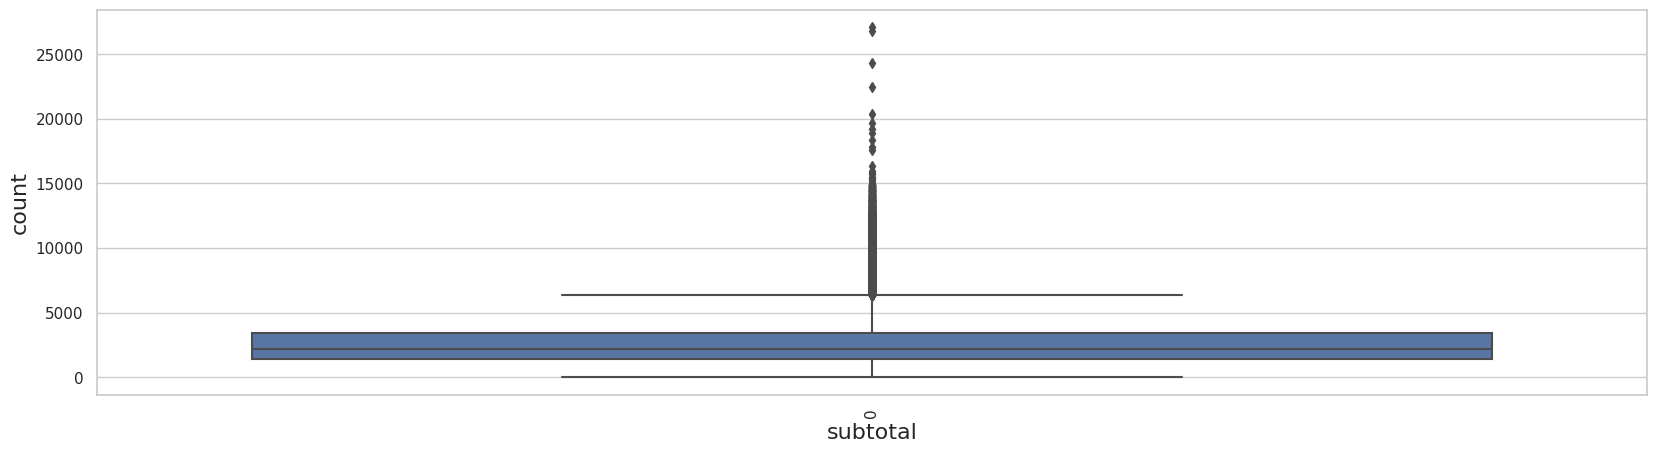

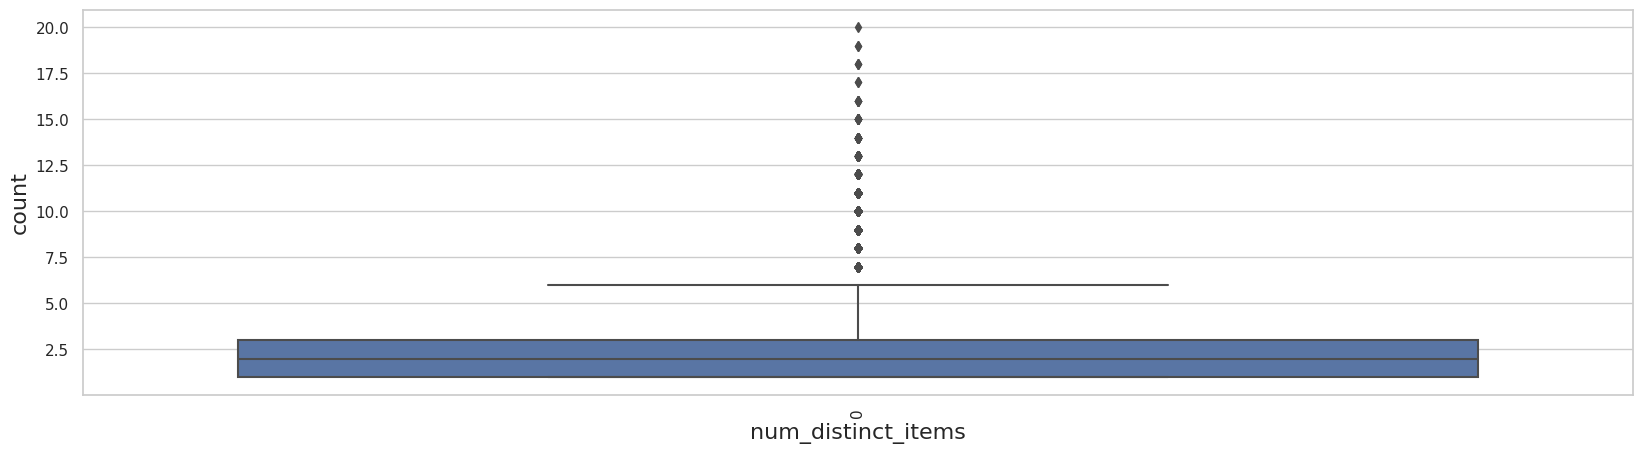

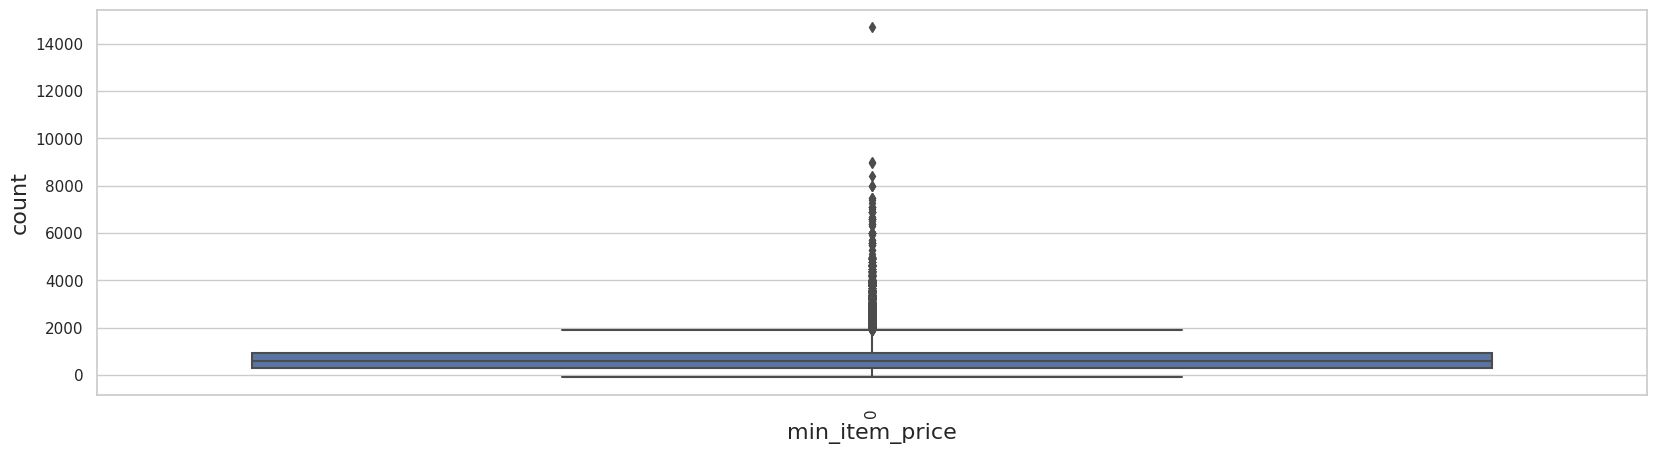

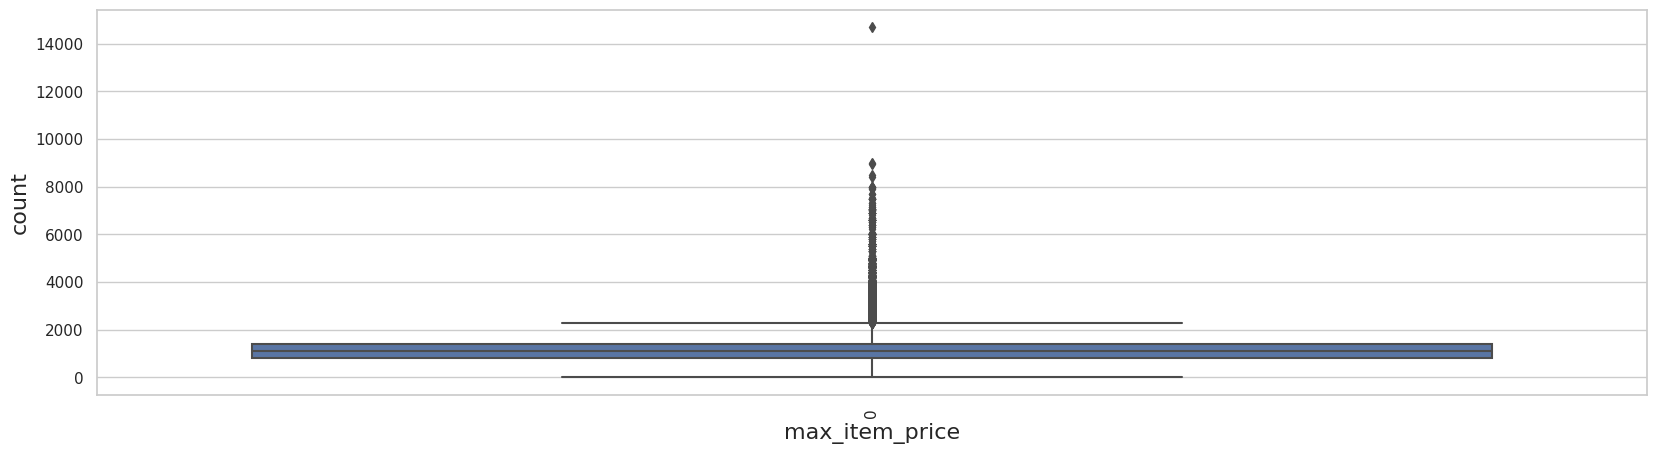

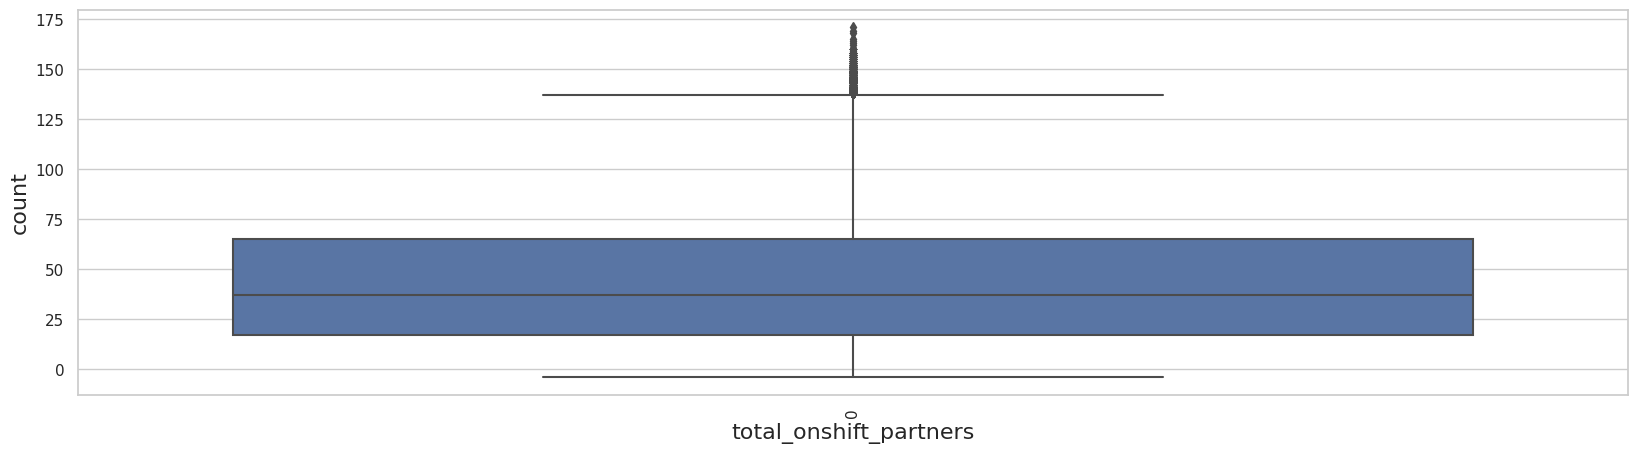

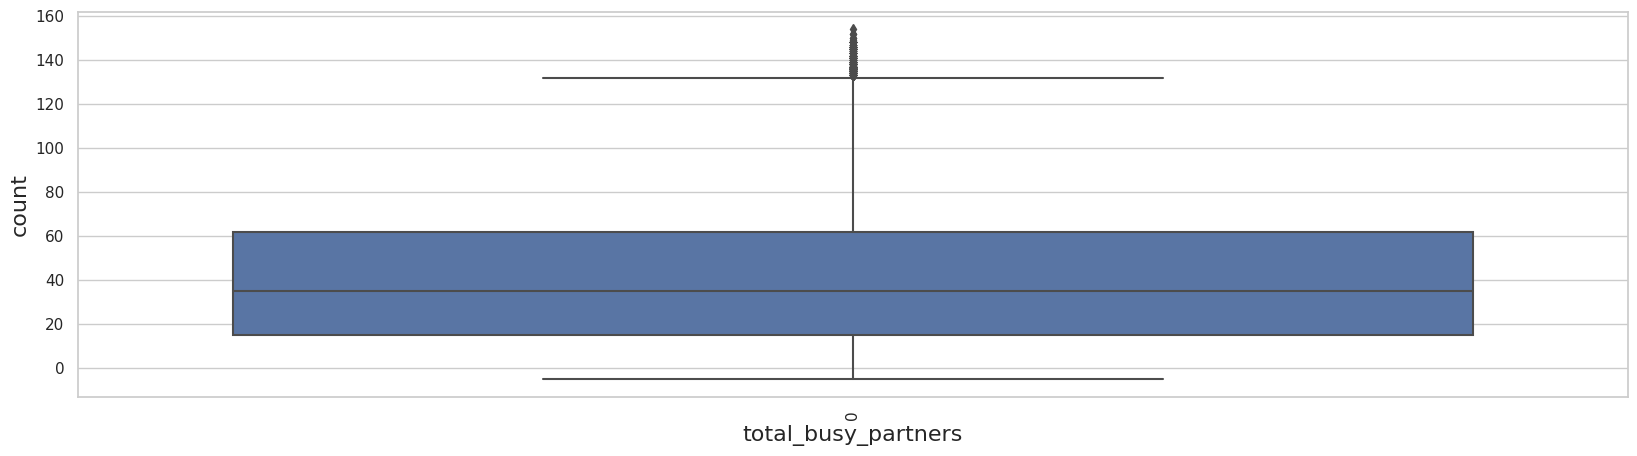

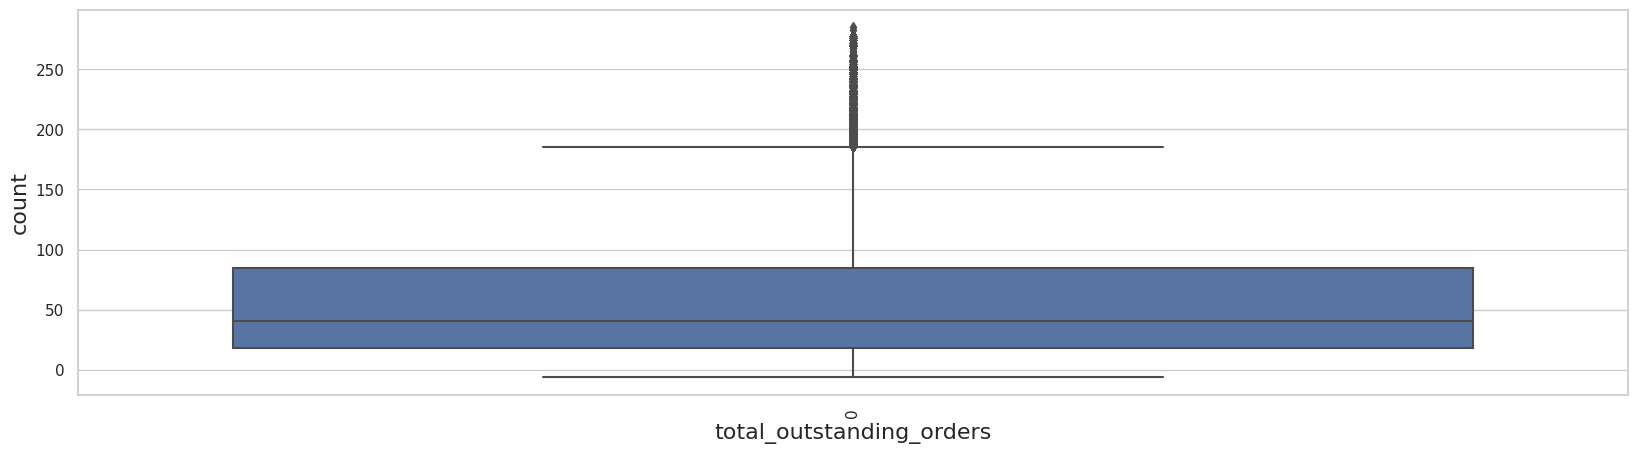

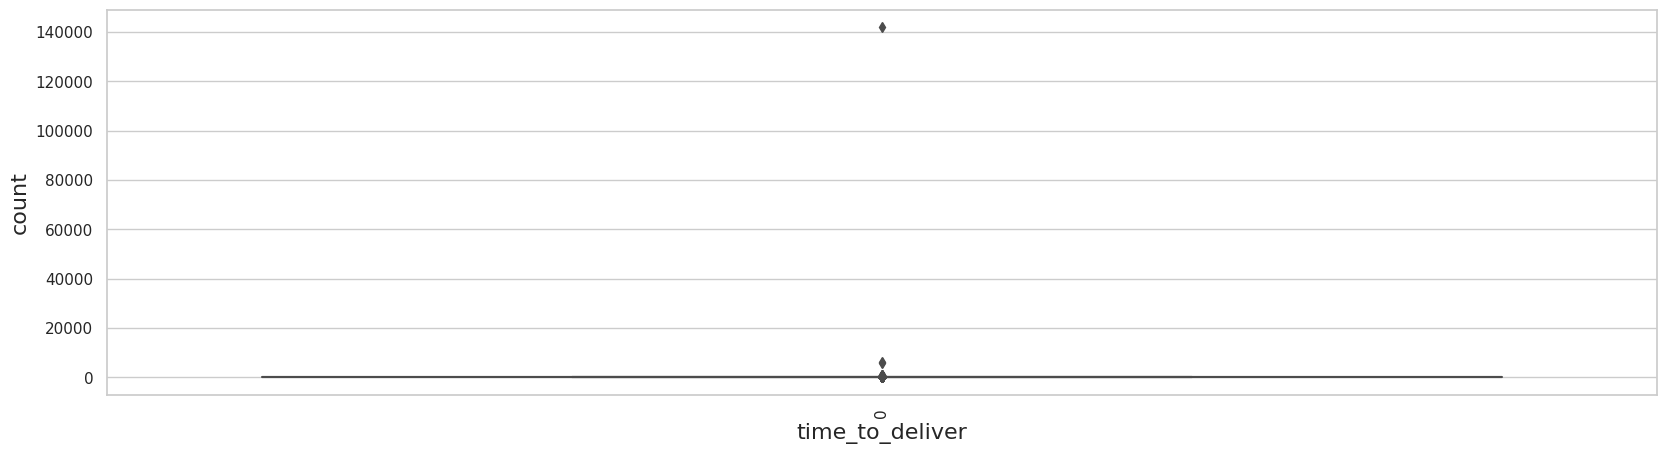

In [ ]:
# Assuming 'df' is your DataFrame
print_outliers(df_1,cont)


Column: subtotal, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 3837, Skewness: 1.34
Column: num_distinct_items, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 0, Skewness: 1.02
Column: min_item_price, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 0, Skewness: 0.92
Column: max_item_price, Count beyond 2nd quartile: 3837, Count beyond 98th quartile: 0, Skewness: 0.96
Column: total_onshift_partners, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 0, Skewness: 0.81
Column: total_busy_partners, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 0, Skewness: 0.72
Column: total_outstanding_orders, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 0, Skewness: 1.06
Column: time_to_deliver, Count beyond 2nd quartile: 0, Count beyond 98th quartile: 3837, Skewness: 0.87


<Figure size 640x480 with 0 Axes>

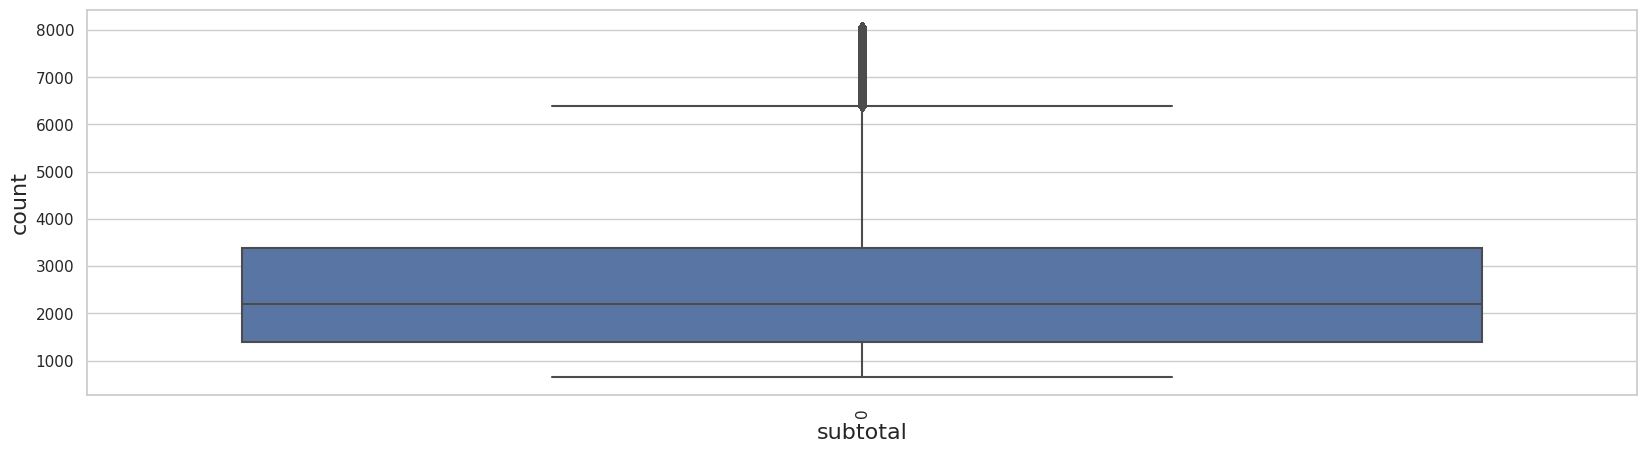

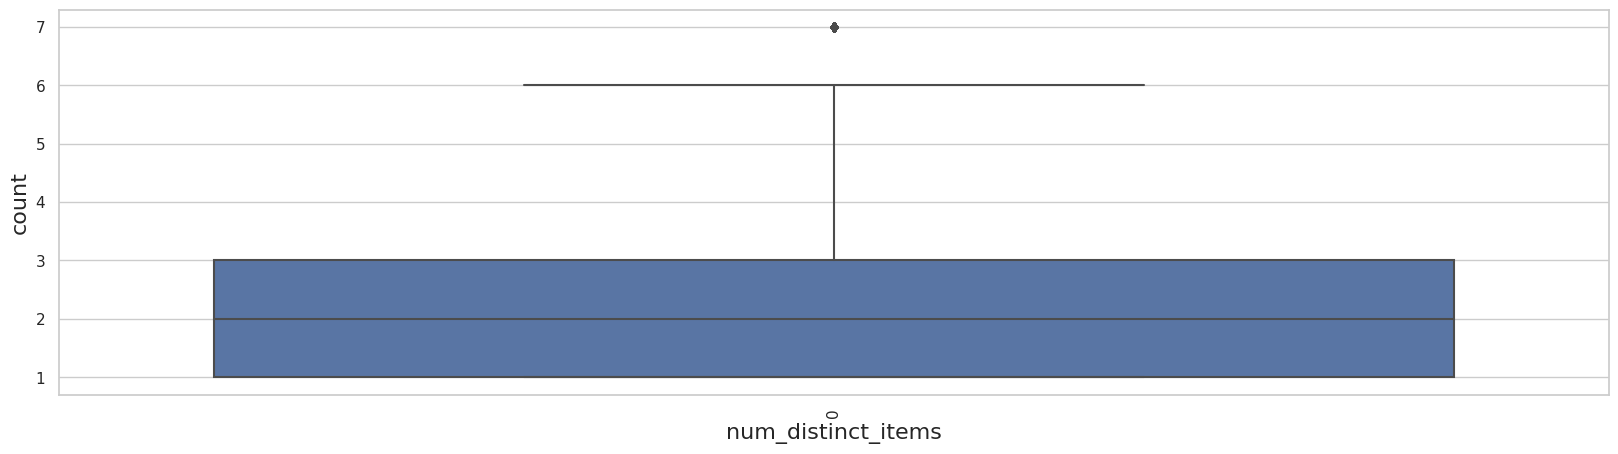

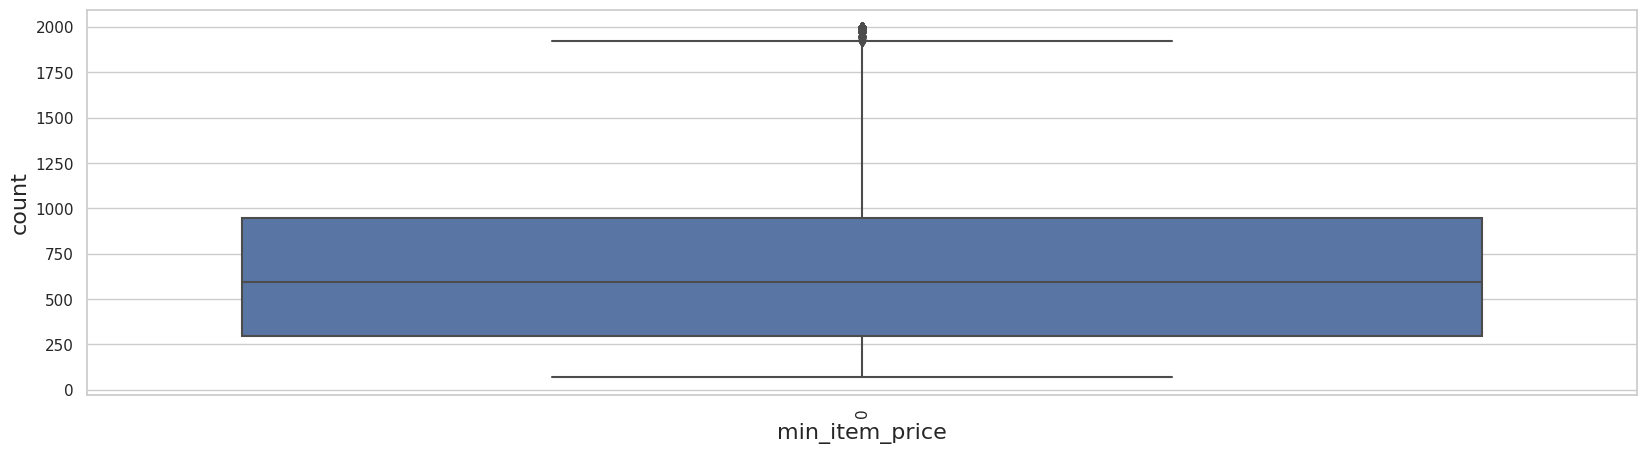

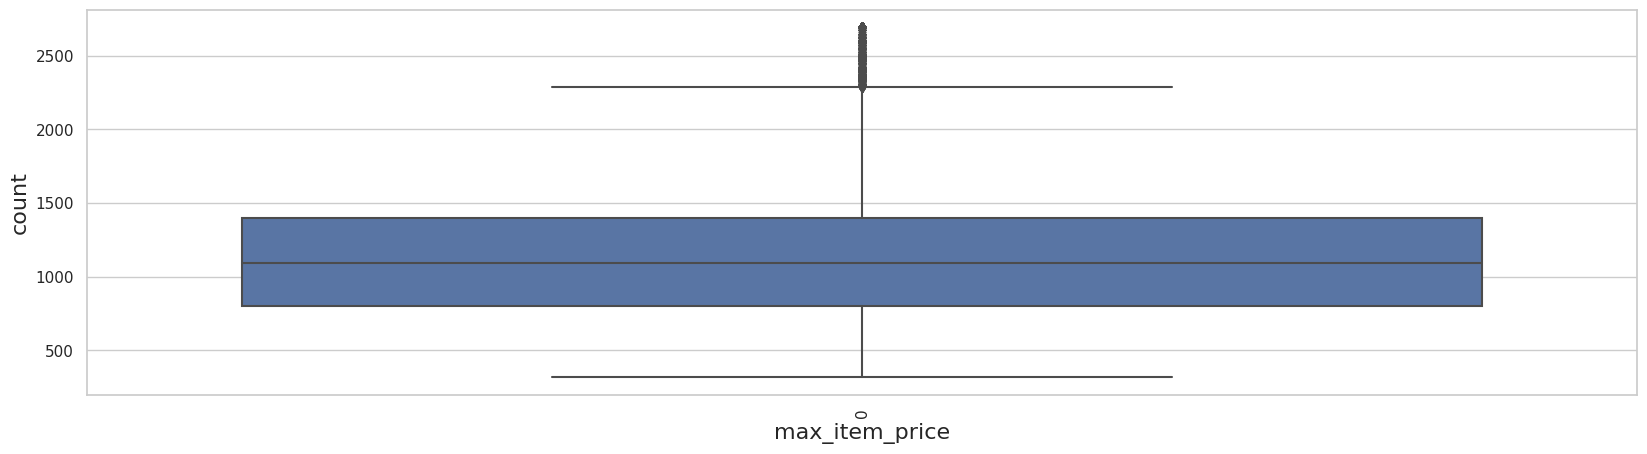

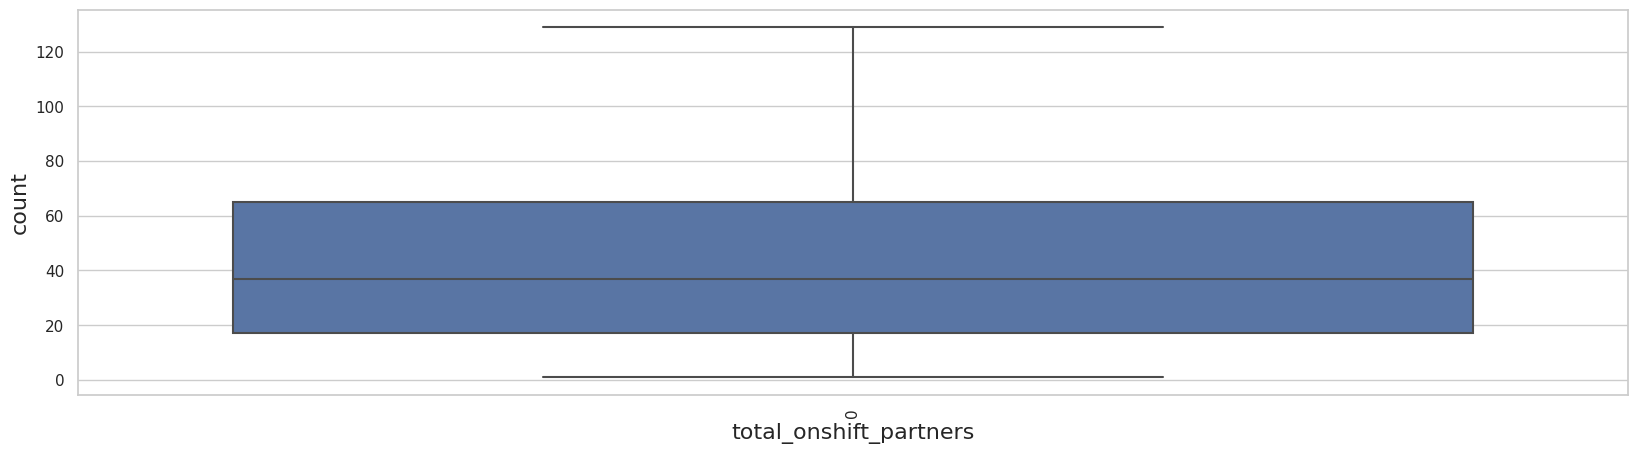

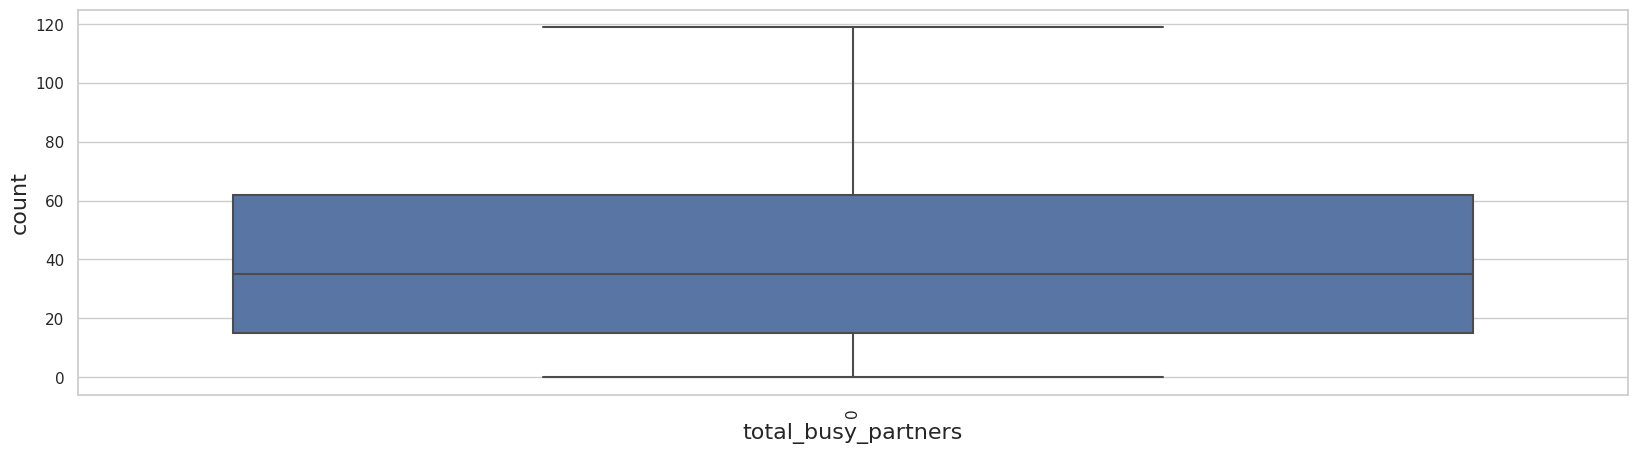

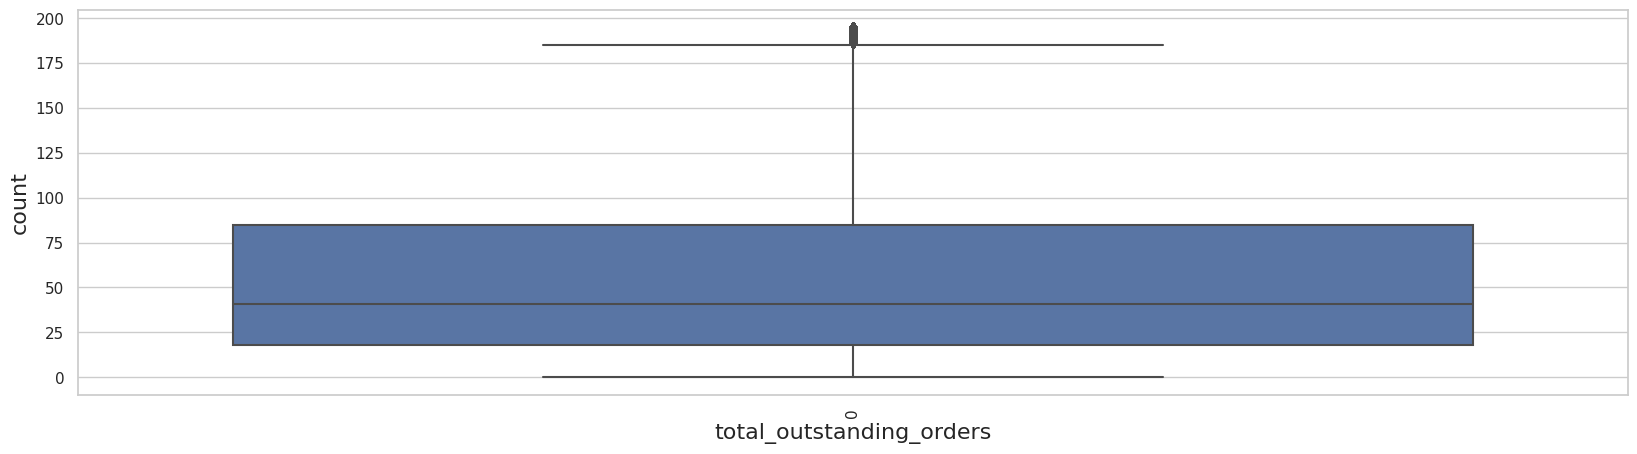

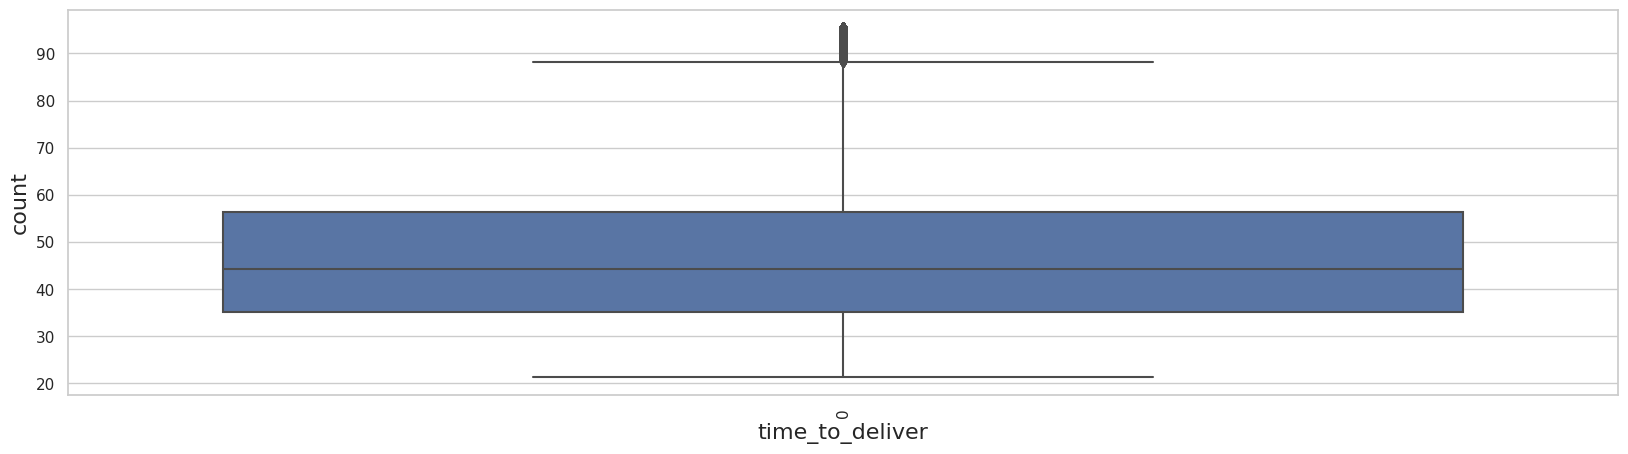

In [ ]:
df_2=treat_outliers(df_1,cont)

In [ ]:
df_2.describe(percentiles=[0.02,0.05,0.1,0.2,0.25,0.5,0.75,0.80,0.9,0.95,0.98])

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_to_deliver,day,hour
count,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000,191822.000000
mean,3.193648,2644.994023,2.636173,671.657552,1145.751009,44.571113,41.501006,57.557819,47.266103,3.218098,8.477630
std,2.668947,1664.076856,1.507100,452.055877,490.641417,33.697135,31.380396,50.842893,16.721995,2.045440,8.661716
min,1.000000,650.000000,1.000000,70.000000,316.840000,1.000000,0.000000,0.000000,21.333333,0.000000,0.000000
2%,1.000000,650.000000,1.000000,70.000000,317.327200,1.000000,0.000000,0.000000,21.333333,0.000000,0.000000
5%,1.000000,805.000000,1.000000,125.000000,439.050000,4.000000,3.000000,3.000000,24.866667,0.000000,0.000000
10%,1.000000,995.000000,1.000000,175.000000,599.000000,7.000000,6.000000,7.000000,28.316667,0.000000,1.000000
20%,1.000000,1270.000000,1.000000,250.000000,759.000000,14.000000,12.000000,14.000000,33.100000,1.000000,1.000000
25%,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,18.000000,35.066667,1.000000,2.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,44.316667,3.000000,3.000000


###  Encoding categorical columns using target encoder

Drop source columns of derived columns

In [ ]:
y=df_1['time_to_deliver']
x=df_1.drop(columns=['created_at','actual_delivery_time','time_to_deliver'])
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size=0.10, random_state=18)

In [ ]:
#Using target encoding instead of one hot encoding
from category_encoders import TargetEncoder
cat_columns=['market_id','store_id','store_primary_category','order_protocol','day','hour']
encoder = TargetEncoder(cols = cat_columns,verbose=1,handle_missing='error')
encoder.fit( X = train_x[cat_columns], y = train_y)
train_x[cat_columns] = encoder.transform(train_x[cat_columns])
test_x[cat_columns] = encoder.transform(test_x[cat_columns])

# Data Visualization

<Figure size 640x480 with 0 Axes>

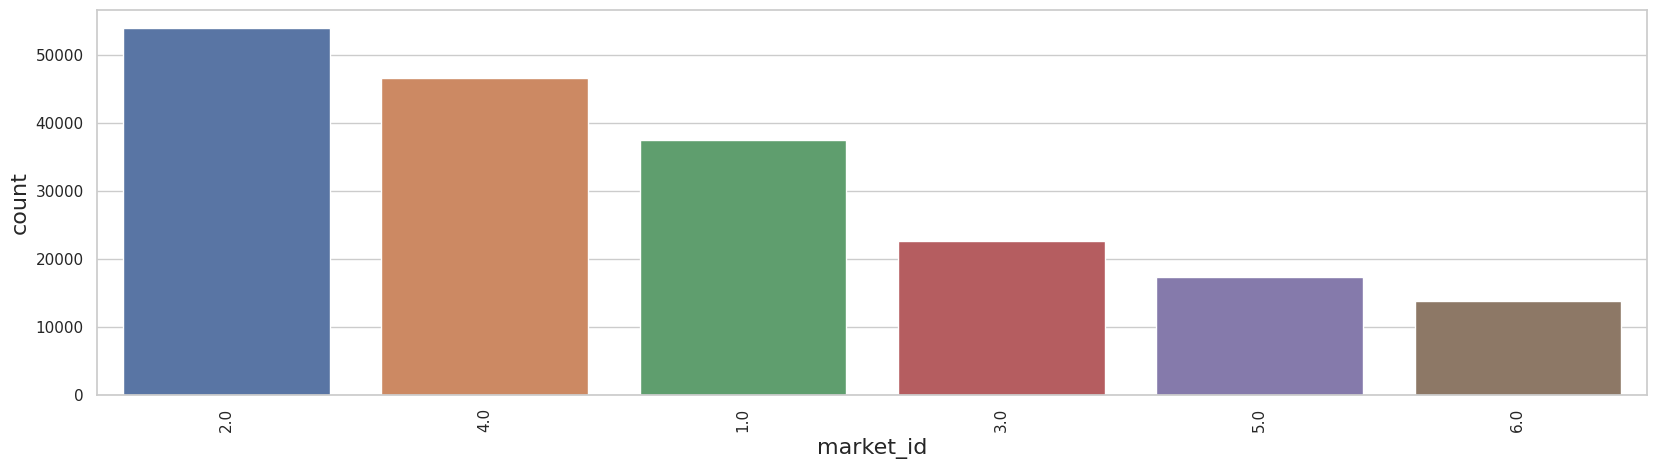

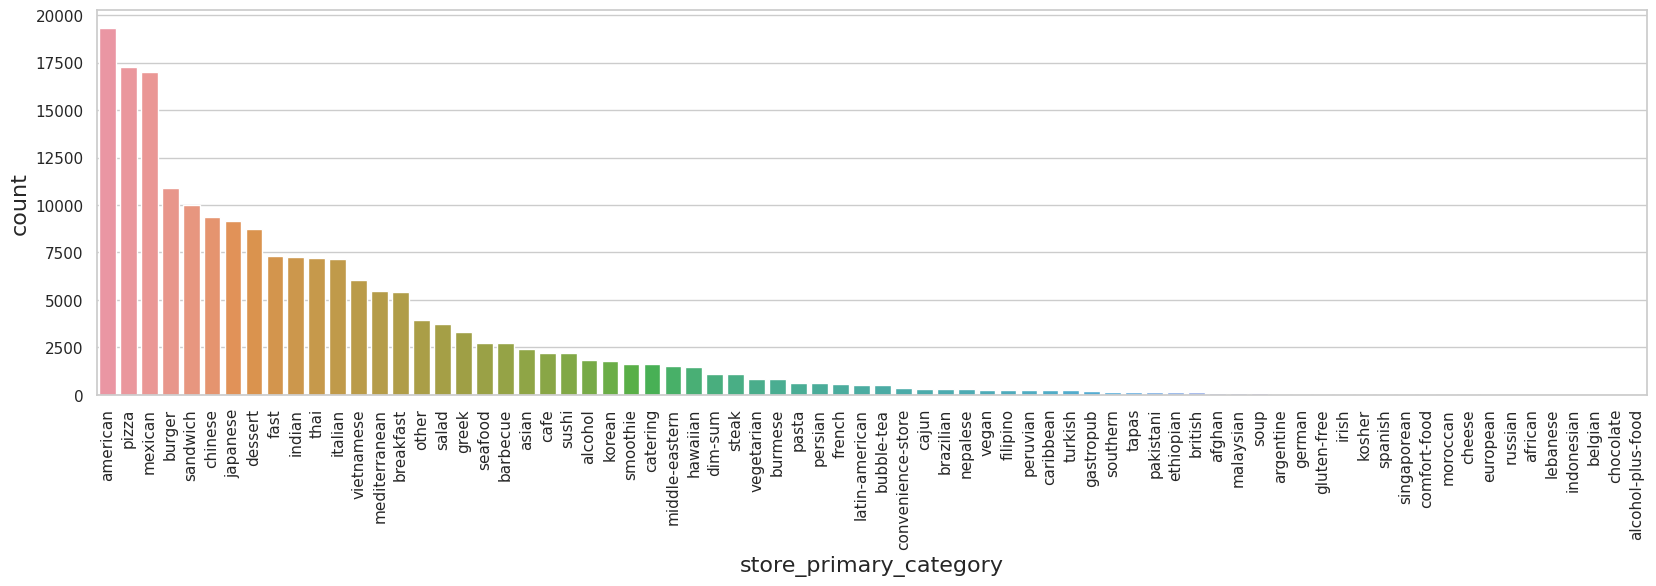

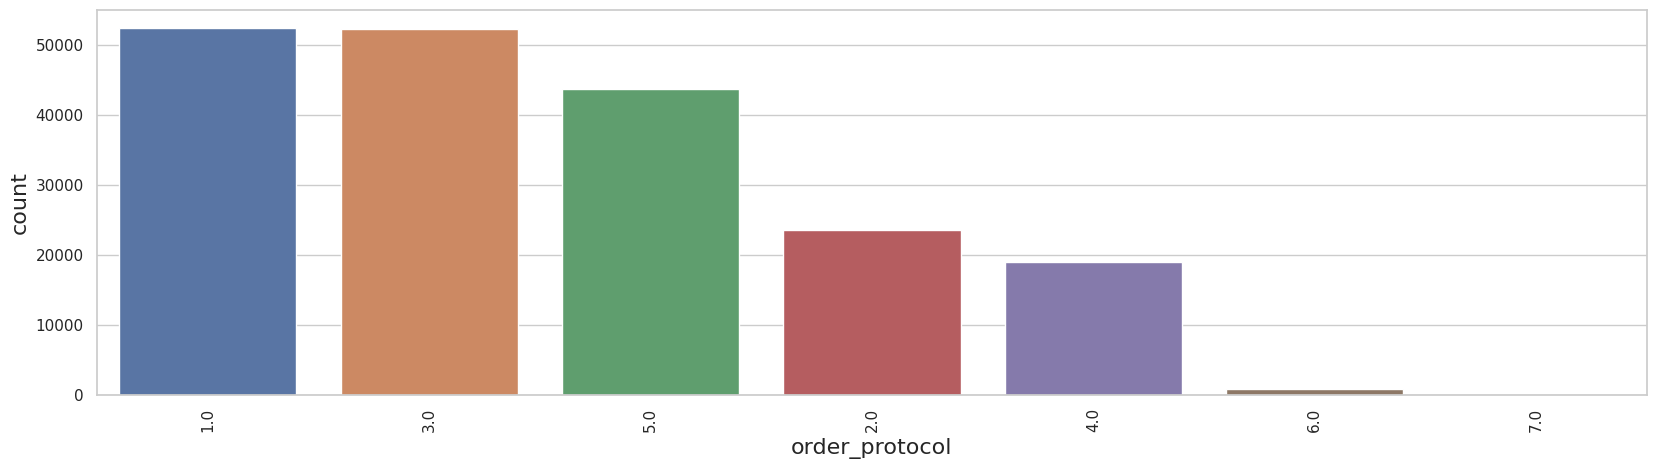

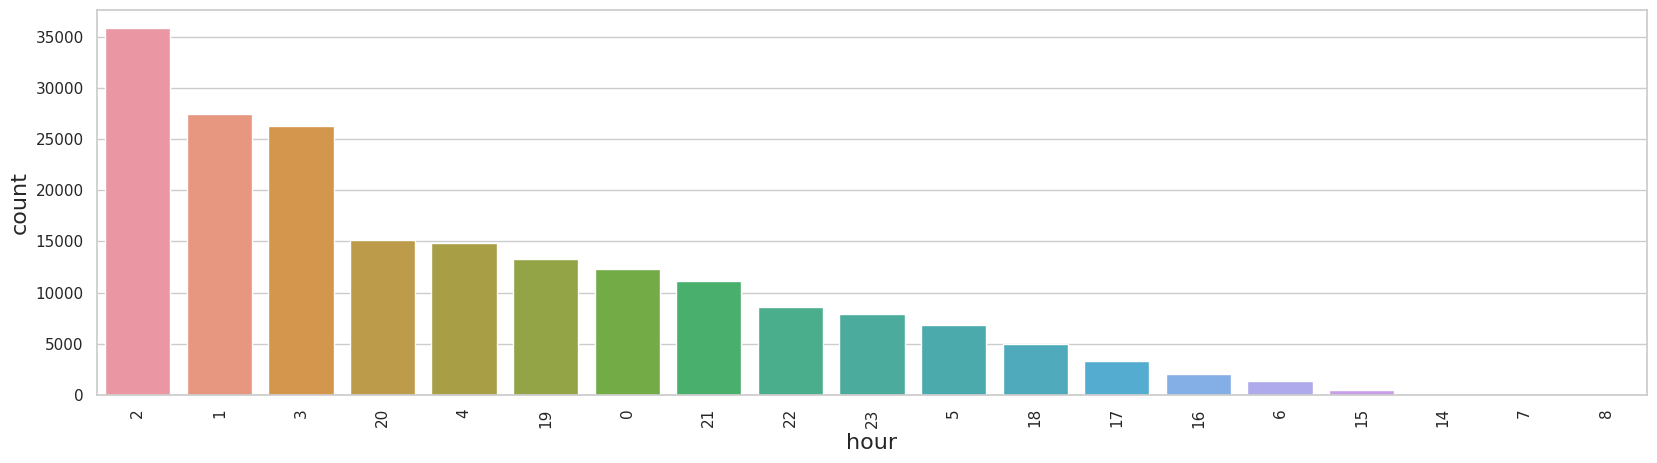

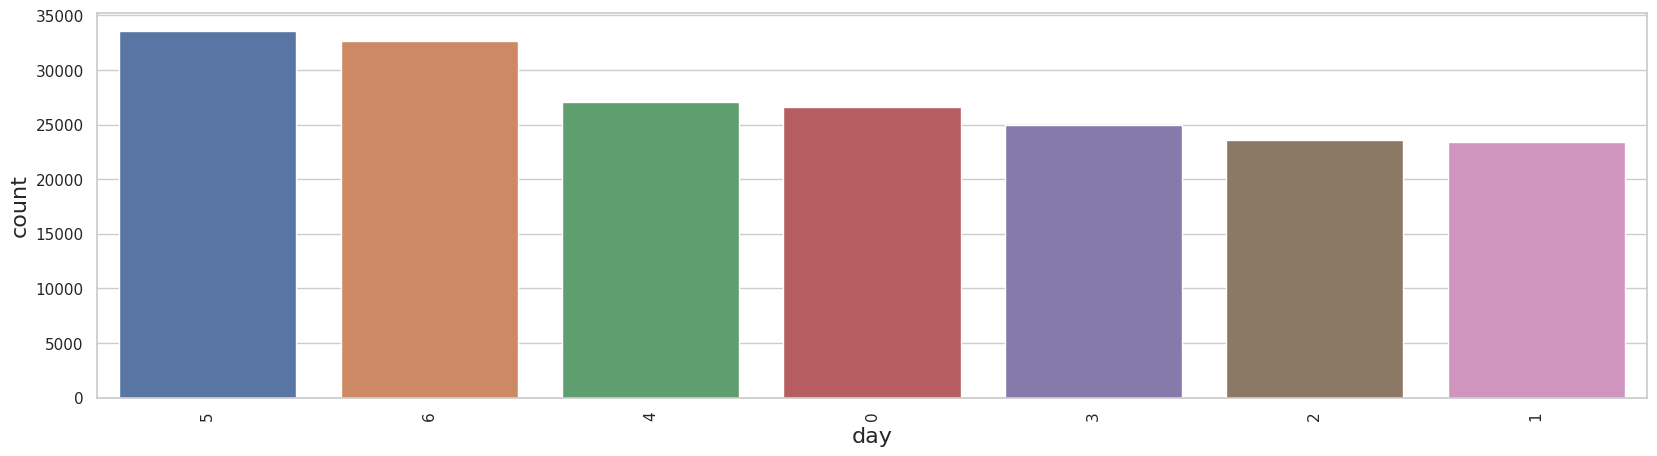

In [ ]:
categorical=['market_id','store_primary_category','order_protocol','hour','day']
for idx, indv_column in enumerate(categorical):
    plt.figure(idx)
    fig = plt.figure(figsize=(20, 5))
    plt.xlabel(indv_column, fontsize=16)
    plt.xticks(rotation = 90)
    plt.ylabel("count", fontsize=16)
    sns.countplot(data=df_1, x=indv_column,order=df_1[indv_column].value_counts(ascending=False).index)

<Figure size 640x480 with 0 Axes>

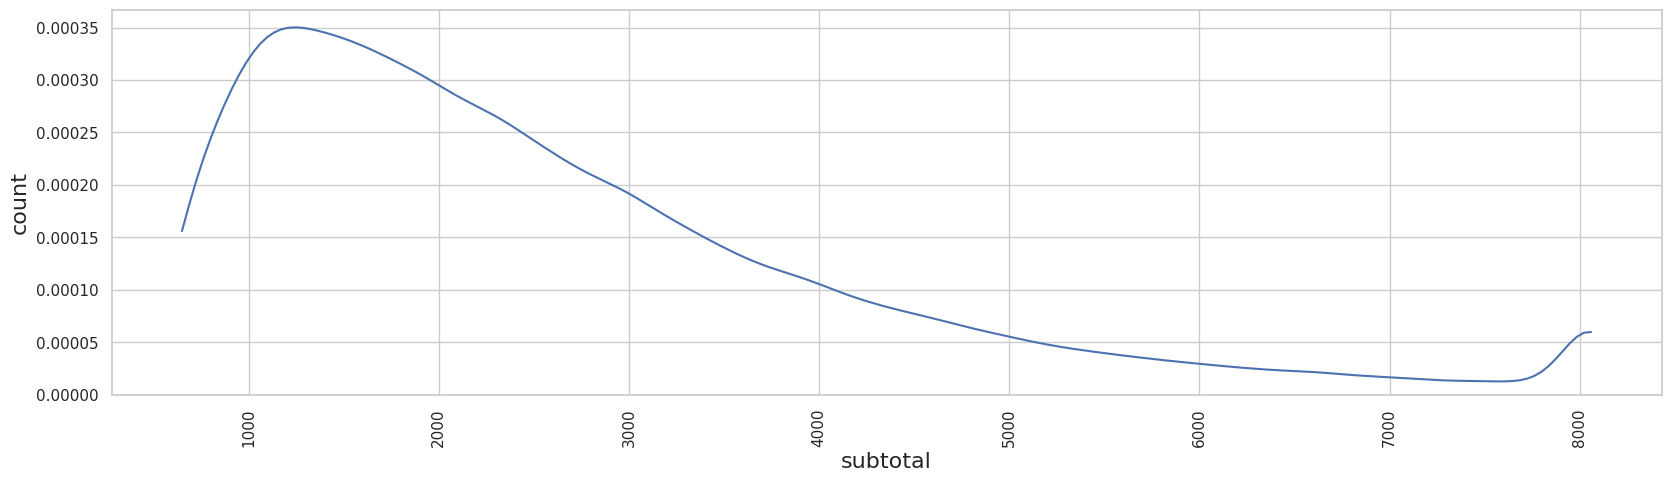

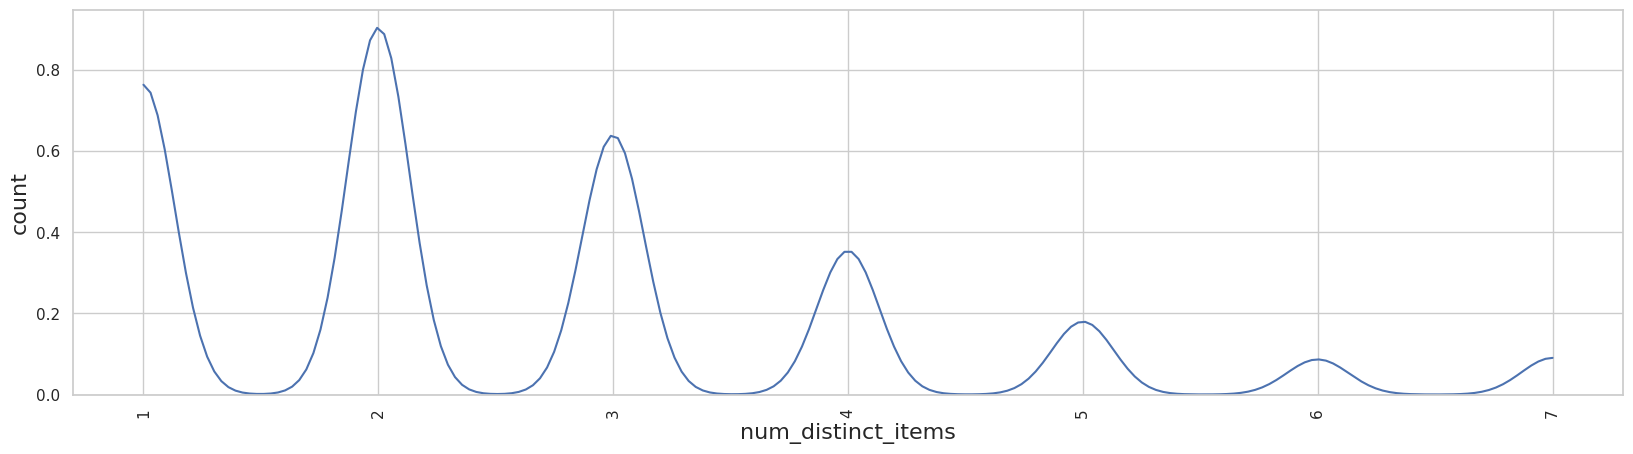

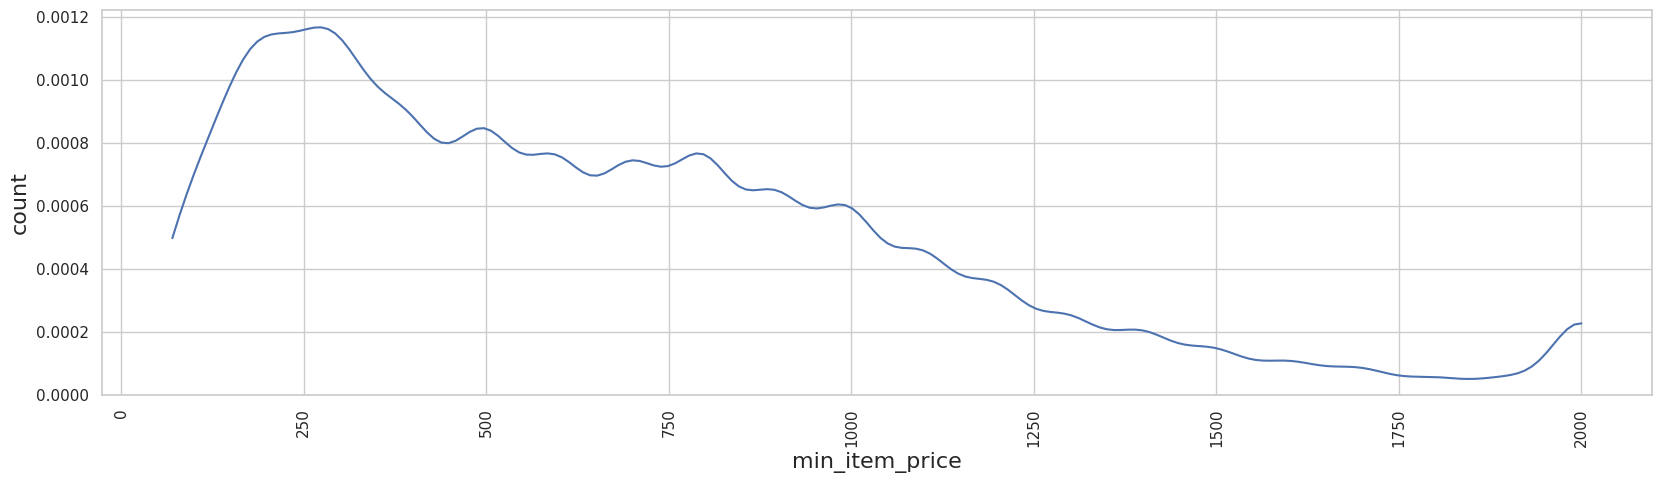

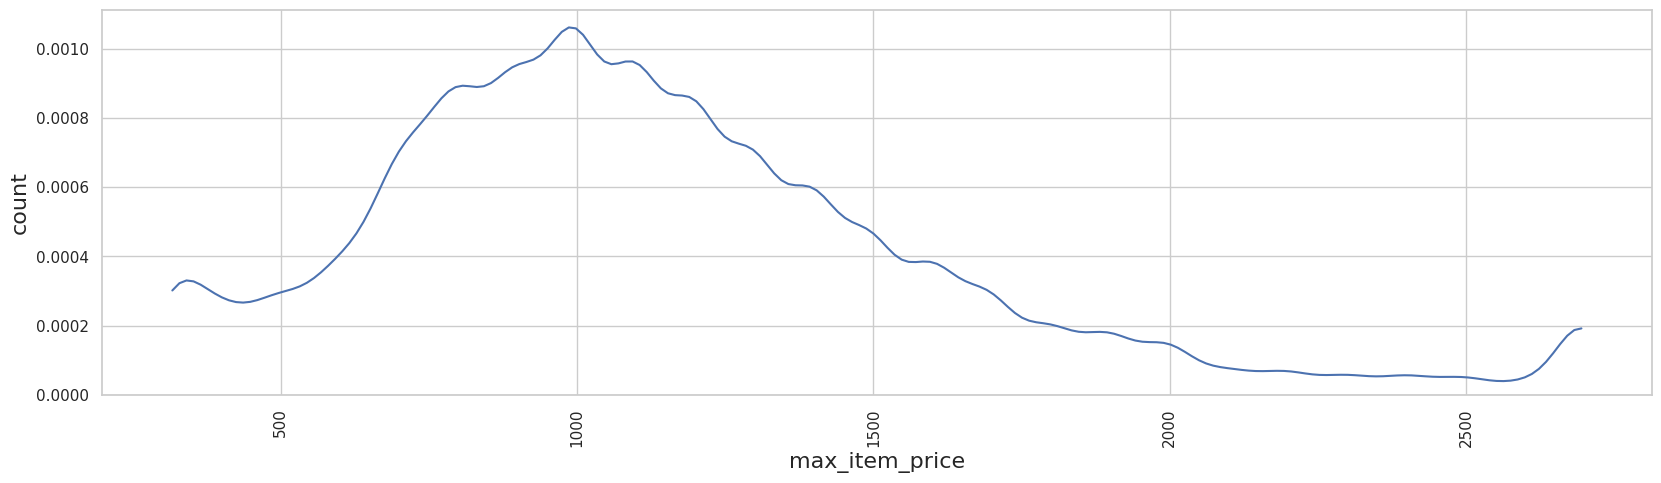

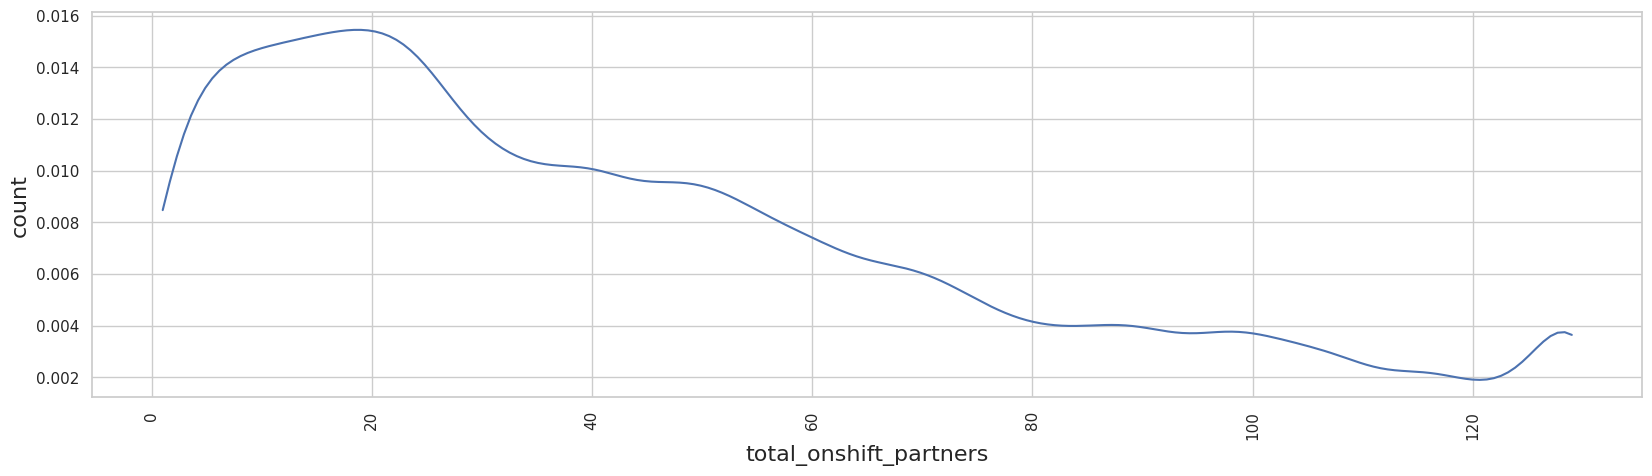

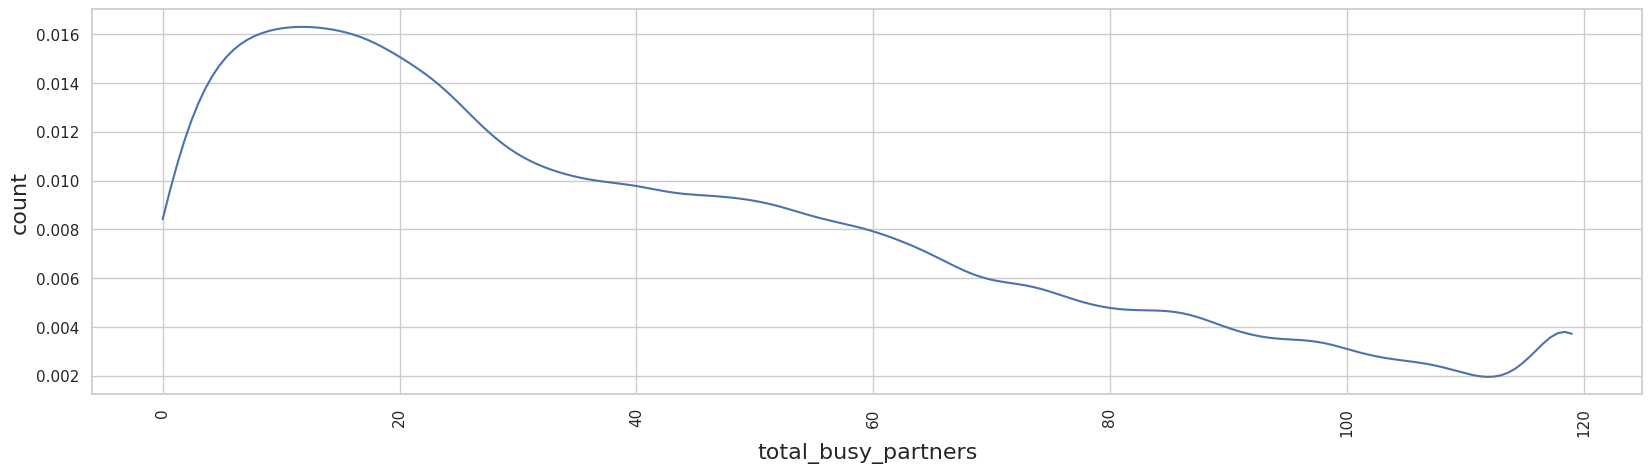

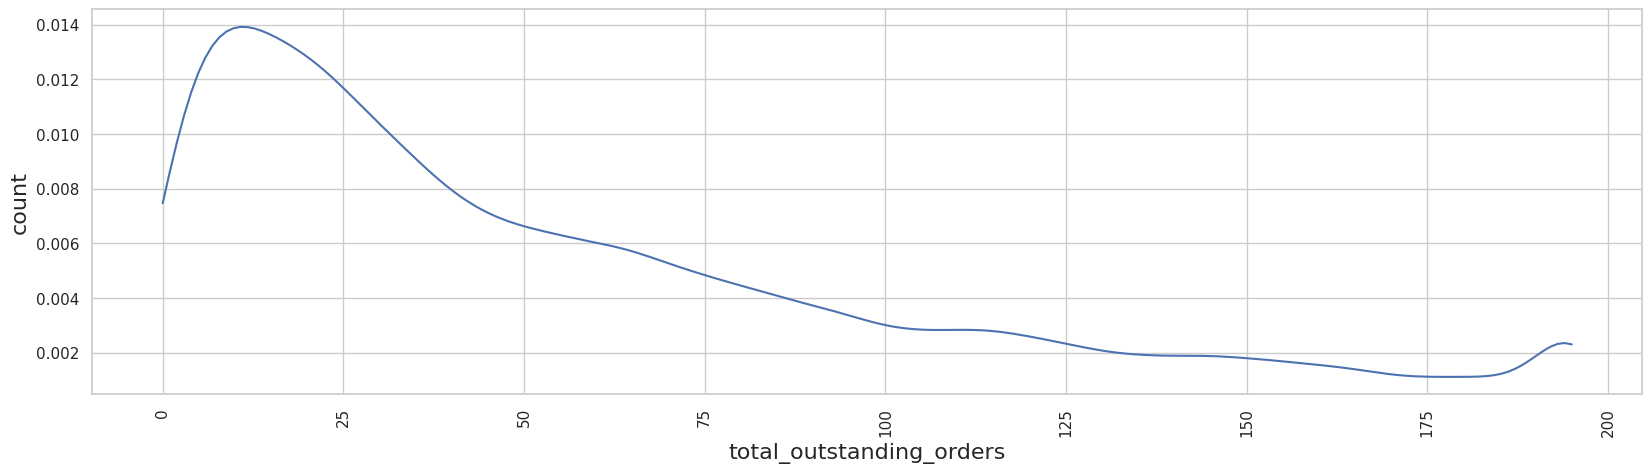

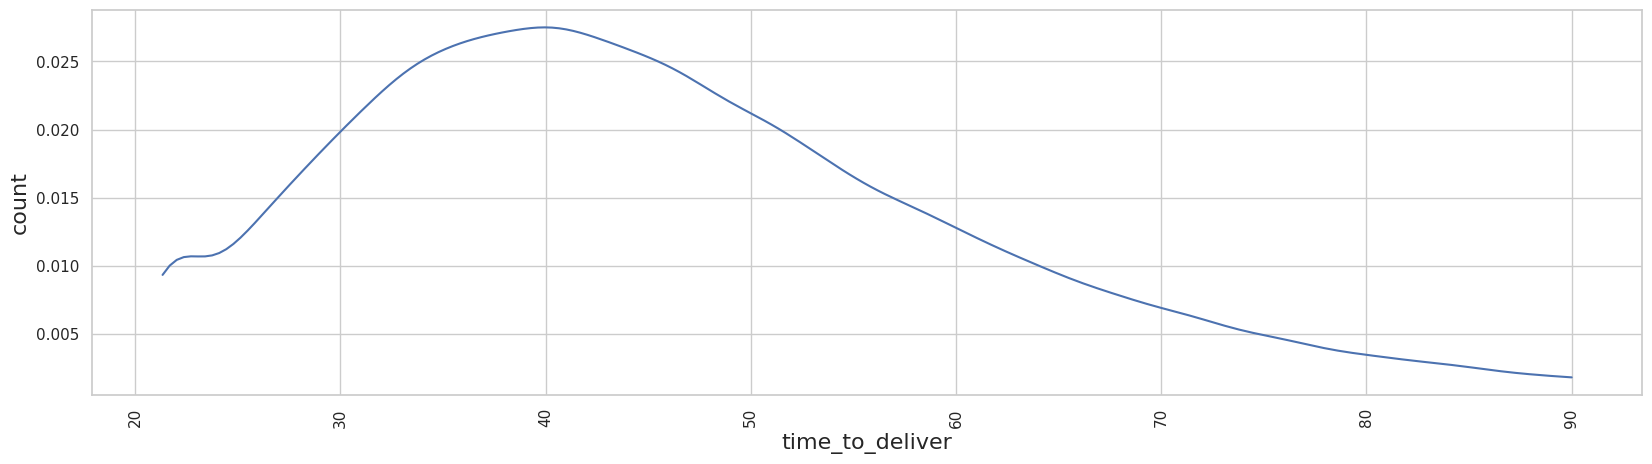

In [ ]:
cont=['subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','time_to_deliver']
for idx, indv_column in enumerate(cont):
    plt.figure(idx)
    fig = plt.figure(figsize=(20, 5))
    plt.xlabel(indv_column, fontsize=16)
    plt.xticks(rotation = 90)
    plt.ylabel("count", fontsize=16)
    max_val=df_1[indv_column].max()
    if indv_column=='time_to_deliver':
      max_val=90
    sns.kdeplot(data=df_1, x=indv_column,clip=(df_1[indv_column].min(),max_val))

### Base Model RandomForest Regressor

In [ ]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (172639, 14)
Training Labels Shape: (172639,)
Testing Features Shape: (19183, 14)
Testing Labels Shape: (19183,)


In [ ]:
rf= RandomForestRegressor(n_estimators = 100, random_state = 18)
rf.fit(train_x, train_y)

RandomForestRegressor(random_state=18)

In [ ]:
predictions = rf.predict(test_x.values)
errors = test_y.values-predictions
print(predictions.shape,errors.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(19183,) (19183,)


In [ ]:
rf_mse=mean_squared_error(test_y.values,predictions)
rf_rmse=mean_squared_error(test_y.values,predictions,squared=False)
rf_mae=mean_absolute_error(test_y.values,predictions)
print(f'Mean squared error={rf_mse}\nRoot mean square error={rf_rmse}\nMean absolute error={rf_mae}')

Mean squared error=188.04715260687612
Root mean square error=13.713028571649522
Mean absolute error=10.584043283524016


# Data scaling

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172639 entries, 18226 to 20397
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 172639 non-null  float64
 1   store_id                  172639 non-null  float64
 2   store_primary_category    172639 non-null  float64
 3   order_protocol            172639 non-null  float64
 4   total_items               172639 non-null  int64  
 5   subtotal                  172639 non-null  float64
 6   num_distinct_items        172639 non-null  float64
 7   min_item_price            172639 non-null  float64
 8   max_item_price            172639 non-null  float64
 9   total_onshift_partners    172639 non-null  float64
 10  total_busy_partners       172639 non-null  float64
 11  total_outstanding_orders  172639 non-null  float64
 12  day                       172639 non-null  float64
 13  hour                      172639 non-null

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler()

In [ ]:
trainX=scaler.transform(train_x)
testX=scaler.transform(test_x)

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(14,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="linear"))
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                960       
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 512)               131584    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)               

In [ ]:
tf.random.set_seed(18)
model.compile(loss='mse', metrics = ['accuracy'], optimizer = keras.optimizers.Adam(learning_rate = 0.001))
model_hist=model.fit(trainX, train_y, validation_split = 0.1, epochs= 50, verbose = 2, batch_size = 1024)

Epoch 1/50
152/152 - 12s - loss: 402.9644 - accuracy: 0.0000e+00 - val_loss: 215.1948 - val_accuracy: 0.0000e+00 - 12s/epoch - 80ms/step
Epoch 2/50
152/152 - 7s - loss: 202.4592 - accuracy: 0.0000e+00 - val_loss: 194.7838 - val_accuracy: 0.0000e+00 - 7s/epoch - 49ms/step
Epoch 3/50
152/152 - 8s - loss: 190.5942 - accuracy: 0.0000e+00 - val_loss: 188.1174 - val_accuracy: 0.0000e+00 - 8s/epoch - 54ms/step
Epoch 4/50
152/152 - 14s - loss: 186.8374 - accuracy: 0.0000e+00 - val_loss: 187.1237 - val_accuracy: 0.0000e+00 - 14s/epoch - 94ms/step
Epoch 5/50
152/152 - 13s - loss: 185.7507 - accuracy: 0.0000e+00 - val_loss: 184.7388 - val_accuracy: 0.0000e+00 - 13s/epoch - 86ms/step
Epoch 6/50
152/152 - 10s - loss: 184.2663 - accuracy: 0.0000e+00 - val_loss: 184.2356 - val_accuracy: 0.0000e+00 - 10s/epoch - 66ms/step
Epoch 7/50
152/152 - 11s - loss: 183.9269 - accuracy: 0.0000e+00 - val_loss: 185.2359 - val_accuracy: 0.0000e+00 - 11s/epoch - 70ms/step
Epoch 8/50
152/152 - 7s - loss: 182.6856 - ac

In [ ]:
m = tf.keras.metrics.MeanSquaredError()


In [ ]:
predictions=np.squeeze(model.predict(testX),axis=1)

600/600 [==============================] - 3s 4ms/step


In [ ]:
nn_mse = mean_squared_error(test_y.values, predictions)
nn_rmse = mean_squared_error(test_y.values, predictions, squared=False)
nn_mae = mean_absolute_error(test_y.values, predictions)
print(f'Mean squared error={nn_mse}\nRoot mean square error={nn_rmse}\nMean absolute error={nn_mae}')

Mean squared error=189.87334627303466
Root mean square error=13.779453772665834
Mean absolute error=10.640724951559084


Comparing results with Random Forest
>neural network results are similar to random forest, but with further training and other hyper parameter tuning, Neural network would definitely outperform

Leading Questions:

1.Defining the problem statements and where can this and modifications of this be used?
Solution Objective : ETA for delivery time
2. List 3 functions the pandas datetime provides with one line explanation.
pd.to_datetime() - converts string to datetime data type
datetime.dt.hour - extracts hour from datetime type
datetime.dt.day  - extracts day from datetime type
3.Short note on datetime, timedelta, time span (period)
4.Why do we need to check for outliers in our data?
Outliers can affect our prediction process and results in higher errors. outliers are data that don't occur usually and one-off cases
5.Name 3 outlier removal methods?
trimming
quantile based clipping
IQR based score
log transformation
6.What classical machine learning methods can we use other than random forest for regression?
linear regression
7.Why is scaling required for neural networks?
to smoothen the optimization landscape.
8.Briefly explain your choice of optimizer.
ADAM - performs better when compared RMS and Momentum put together.
9.Which activation function did you use and why?
relu - as it known to avoid vanishing gradients
10. Why does a neural network perform well on a large dataset?
Ability to learn complex non linear functions